The Spark Foundation
## Data Science & Business Analytics Internship 

**By VISHAL YELMAR**

# **Task 2: Prediction using Unsupervised ML**

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [17]:
data=pd.read_csv("./iris.csv")
print(data)


      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [18]:
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Finding the optimum number of clusters**

In [19]:
X = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss: ",kmeans.inertia_)

k: 1 wcss:  281831.54466666665
k: 2 wcss:  70581.3808
k: 3 wcss:  31320.711199999998
k: 4 wcss:  17762.657226173542
k: 5 wcss:  11423.238080088988
k: 6 wcss:  7909.530673076923
k: 7 wcss:  5881.448116883117
k: 8 wcss:  4562.7800793650795
k: 9 wcss:  3579.72056127451
k: 10 wcss:  2968.491432665374


# **Plotting the results and observe The elbow**

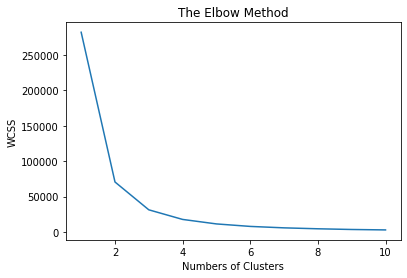

In [20]:

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

# **Applying KMeans and Predicting values**

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

# **Visualising the clusters and Plotting the centroids of the clusters**

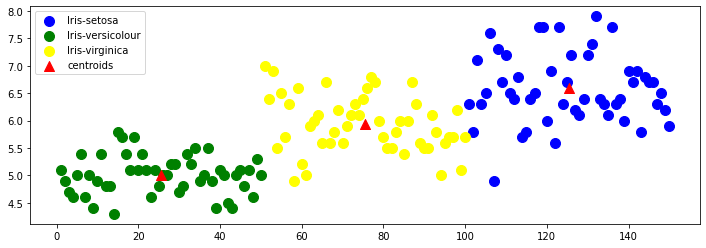

In [22]:
plt.figure(figsize=(12,4))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='blue',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='yellow',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='centroids', marker="^")
plt.legend()